motivation: tpus are suspended all the time, so curves are segmented

In [1]:
import json
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

s3b_bs16k = {
    # "vlm_clip": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/clip_bs16384_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_12lyr_07-25_1415",
    # "vlm_siglip_v4-32": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/siglip_replication_pod_04-11_2247",
    # "vlm_cappa": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/cappa_bs16384_s3B_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_06-27_2108",
    # "vlm_coca": "gs://us-centr/al2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_0.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_12lyr_scan-F_fsdp-F_09-06_0243",
    # "vlm_coca_6lyr": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_replication_s3b_bs16384_warm0.03_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_scan-F_fsdp-F_08-19_0355",
    # "contrastive_9+9_llm_gap_0.01": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-gap_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-01_0446",
}
s9b_bs32k = {
    # "vlm_clip_s9b_bs32k": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/clip_s9b_bs32k_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_08-09_0655",
    # "vlm_siglip_s9b_bs32k":"gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/siglip_s9b_bs32k_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_08-04_0839",
    "vlm_cappa_s9b_bs32k":"gs://us-central2-storage/tensorflow_datasets/cappa_bs32768_s9B_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_08-07_2217",
    # "vlm_coca_6lyr_s9b_bs32k":"gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s9b_bs32768_warm0.03_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_scan-F_fsdp-F_08-20_0246",
    # "contrastive_unfreeze_llm_half_s9b_bs32k": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-half-0.1_b16-F_contrastive_bs32768_s9b_wd1e-4_08-21_1935",
}

vlm_ablations = {
    # "vlm_clip_gemma_scale": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/clip_scale-gemma_s3b_bs16k_warm0.03_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_08-31_2145",
    # "vlm_coca_6lyr_1.0co_0.0ca": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_1.0co-0.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_scan-F_fsdp-F_09-05_0535",
    # "vlm_coca_6lyr_0.0co_1.0ca": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_0.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_scan-F_fsdp-F_09-05_0603",
    # "vlm_coca_6lyr_0.0co_1.0ca_corrected": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_0.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_scan-F_fsdp-F_09-06_1815",
    # 'vlm_coca_1.0co_1.0ca_6lyr_qknorm-T_warm0.02': 'gs://us-central2-storage/tensorflow_datasets/ckpts/coca_replication_bs16384_warm0.02_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_b2-0.95_6lyr_06-10_2225',
    "vlm_coca_6lyr_1.0co_1.0ca_corrected_masked0.00": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_masked0.75_scan-F_fsdp-F_09-07_2125",
    # "vlm_coca_6lyr_1.0co_1.0ca_corrected_masked0.75": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_b2-0.95_6lyr_masked0.75_scan-F_fsdp-F_09-09_1629",
    # "vlm_coca_6lyr_0.0co_1.0ca_corrected_masked0.00_wd1e-3": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm0.03_0.0co-1.0ca_lr1e-3_wd1e-3_bf16_qknorm-F_b2-0.95_6lyr_masked0.0_scan-F_fsdp-F_09-11_1326",
    "vlm_coca_6lyr_1.0co_1.0ca_corrected_warm10k": "gs://us-central2-storage/tensorflow_datasets/vit-b-16_3b_pretraining/coca_unified_s3b_bs16384_warm10k_1.0co-1.0ca_lr1e-3_wd1e-4_bf16_qknorm-F_capln-T_unimask-causal_b2-0.95_6lyr_masked0.0_scan-F_fsdp-F_09-23_1822",
}

vllm_ablations = {
    # "contrastive_freeze_llm": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-T_so400m-F_contrastive_bs16384_s3b_wd1e-4_08-18_0712",
    # "contrastive_unfreeze_llm": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-0.1_so400m-F_contrastive_bs16384_s3b_wd1e-4_08-20_2032",
    # "contrastive_unfreeze_llm_6lyr": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-6lyr-0.1_so400m-F_contrastive_bs16384_s3b_wd1e-4_08-20_2032",
    # "contrastive_unfreeze_llm_6lyr_map": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-6lyr-0.1-map_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_08-27_1857",
    # "contrastive_unfreeze_llm_half": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-half-0.1_so400m-F_contrastive_bs16384_s3b_wd1e-4_08-21_1935",
    # "contrastive_unfreeze_llm_half_scratch": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-half-scratch-0.1_so400m-F_contrastive_bs16384_s3b_wd1e-4_08-22_0327",
    # "contrastive_unfreeze_llm_ln_gap": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-ln-0.1-gap_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_08-28_1538",
    # "contrastive_9+9_llm_map": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.1-map_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_08-30_1639",
    # "contrastive_9+9_llm_gap_0.1_drop0.0": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.1-gap_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_08-28_1934",
    # "contrastive_9+9_llm_gap_0.01_drop0.0_vocab256128": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-gap-vocab256128_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-03_2131",
    # "contrastive_9+9_llm_gap_0.01_drop0.0_vocab256128_projT": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-gap-vocab256128-projT_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-04_1643",
    # "contrastive_9+9_llm_gap_0.01_drop0.2": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.2-gap_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-02_1819",
    # "contrastive_9+9_llm_eos_0.01_drop0.0": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-eos_b16-F_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-03_0033",
    # "contrastive_15+3_llm_eos_0.01_drop0.0_vocab256128_projT_so400m": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen15-0.01-drop0.0-vocab256128-eos-projT_so400m_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-05_1844",
    # "contrastive_9+9_llm_eos_0.01_drop0.0_vocab256128_projT_b16_beitT": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-vocab256128-eos-projT_b16-beitT_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-08_0446",
    # "contrastive_9+9_llm_eos_0.01_drop0.0_vocab256128_projT_fp32_beitT": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-vocab256128-eos-projT_b16-beitT_contrastive_bs16k_s3b_lr1e-3_wd1e-4_fp32_09-10_1455",
    # "contrastive_9+9_llm_gap_0.01_drop0.0_vocab256128_projT_b16_newbeitT": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-vocab256128-gap-projT_b16-beitT_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-18_1545",
    # "contrastive_9+9_llm_gap_0.01_drop0.0_vocab256128_projT_b16_newbeitT_dpr0.2": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen99-0.01-drop0.0-vocab256128-gap-projT_b16-beitT_contrastive_dpr0.2_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-18_2029",
    "contrastive_scratch_9+9_llm_gap_0.01_drop0.0_vocab256128_projT_b16_newbeitT_drp0.0": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-scratch-partial_frozen99-0.01-drop0.0-vocab256128-gap-projT_b16-beitT_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-20_1540",
    "contrastive_scratch_9+9_llm_gap_0.01_drop0.0_vocab256128_projT_b16_newbeitF_drp0.0": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-scratch-partial_frozen99-0.01-drop0.0-vocab256128-gap-projT_b16-beitF_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-20_1840",
    # "generative_12+6_llm_none_0.01_drop0.0_bf16_beitF": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-partial_frozen12-0.01-drop0.0-none_b16-beitF_contrastive_bs16k_s3b_lr1e-3_wd1e-4_bf16_09-08_0448",
    # "generative_unfreeze_llm_half": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-half-pretrained-0.1_so400m-F_generative_bs16384_s3b_wd1e-4_08-22_0402",
    # "generative_unfreeze_llm_full": "gs://us-central2-storage/tensorflow_datasets/mllm_ckpts/paligemma/gemma2b-full-0.1_so400m-F_generative_bs16384_s3b_wd1e-4_08-25_0445",
} 

experiments_dict = {
    **s3b_bs16k,
    # **s9b_bs32k,
    **vlm_ablations,
    # **vllm_ablations,
}


def get_metrics(experiment_name, x_axis='examples_seen', y_axis='z/0shot/imagenet2012_accuracy'):
    ckpt_path = experiments_dict[experiment_name]
    metrics_path = f'{ckpt_path}/big_vision_metrics.txt'

    metrics = {}
    count = 1
    with tf.io.gfile.GFile(metrics_path, 'r') as f:
        lines = f.read().split('\n')
        for line in lines:
            if len(line) == 0:
                continue
            line_dict = json.loads(line)
            if line_dict['step'] % 100 == 0 or 'z/0shot/imagenet2012_accuracy' in line_dict.keys() or 'val_coco/perplexity' in line_dict.keys():
                if count==1:
                    print(line_dict.keys())
                    count = 0
                x = line_dict[x_axis]
                y = line_dict[y_axis] if y_axis in line_dict else None
                if y is not None:
                    metrics[x] = y
    return metrics

2024-09-24 01:51:33.755961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 01:51:33.777770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 01:51:33.784487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 01:51:33.800179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 01:51:34.855440: W tensorflow/compiler/tf2

Getting metrics for vlm_coca_6lyr_1.0co_1.0ca_corrected_masked0.00 and step vs. l2_grads
dict_keys(['step', 'global_schedule', 'captioning_loss', 'contrastive_logits_average', 'contrastive_logits_max', 'contrastive_logits_min', 'contrastive_loss', 'contrastive_temperature', 'l2_grads', 'l2_params', 'l2_updates', 'lr', 'lr_schedule', 'training_loss', 'uptime', 'examples_seen', 'progress', 'epoch', 'img/sec/core', 'core_hours_TPU v4', 'core_hours'])
Getting metrics for vlm_coca_6lyr_1.0co_1.0ca_corrected_warm10k and step vs. l2_grads
dict_keys(['step', 'global_schedule', 'captioning_loss', 'contrastive_logits_average', 'contrastive_logits_max', 'contrastive_logits_min', 'contrastive_loss', 'contrastive_temperature', 'l2_grads', 'l2_params', 'l2_updates', 'lr', 'lr_schedule', 'training_loss', 'uptime', 'examples_seen', 'progress', 'epoch', 'img/sec/core', 'core_hours_TPU v4', 'core_hours'])


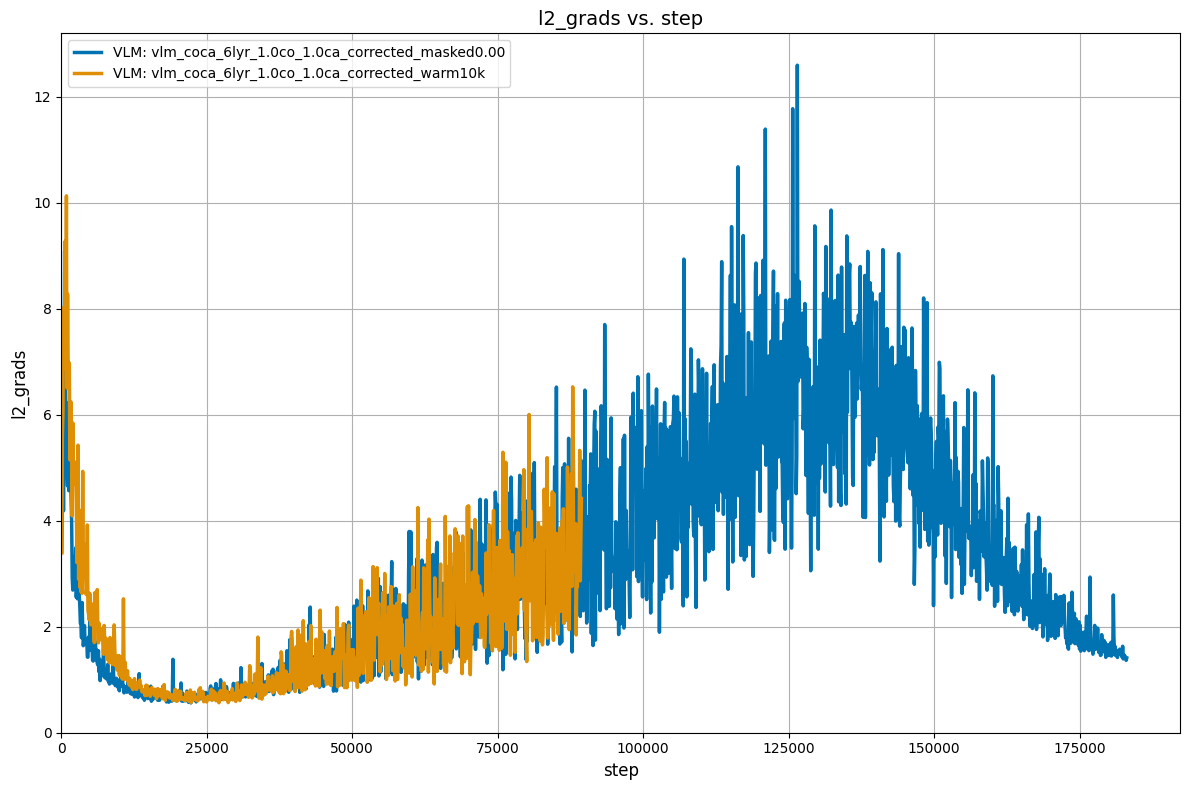

In [2]:
# Collect data for all experiments
x_axis = 'step' 
# step, examples_seen, core_hours, 
# global_schedule, lr, lr_schedule, uptime, progress, epoch, core_hours_TPU v4
y_axis = 'z/0shot/imagenet2012_accuracy'
y_axis = 'l2_grads'
# l2_grads, l2_params, l2_updates, training_loss,
# z/retr/coco_img2txt_recall@1, z/retr/coco_img2txt_recall@5, z/retr/coco_img2txt_recall@10,
# z/retr/coco_txt2img_recall@1, z/retr/coco_txt2img_recall@5, z/retr/coco_txt2img_recall@10,
# z/0shot/imagenet2012_accuracy, z/0shot/imagenet_v2_accuracy, z/0shot/imagenet2012_real_accuracy
# captioning_loss, val_coco/perplexity, imagenet/scoring/prec@1
all_metrics = {}
for experiment_name in experiments_dict.keys():
    print(f'Getting metrics for {experiment_name} and {x_axis} vs. {y_axis}')
    all_metrics[experiment_name] = get_metrics(experiment_name, x_axis=x_axis, y_axis=y_axis)


# Plot all experiments on the same graph
plt.figure(figsize=(12, 8))

vlm_experiments = [exp for exp in experiments_dict.keys() if 'vlm' in exp]
llm_experiments = [exp for exp in experiments_dict.keys() if 'llm' in exp]

# Define color schemes for vlm and llm groups
palette = sns.color_palette("colorblind", 8)
vlm_colors = palette[:len(vlm_experiments)]  # First colors for CLIP
llm_colors = palette[len(vlm_experiments):]  # Last colors for LLM

# Plot VLM experiments
for i, experiment_name in enumerate(vlm_experiments):
    metrics = all_metrics[experiment_name]
    linestyle = '-.' if 's9b_bs32k' in experiment_name else '-'
    plt.plot(list(metrics.keys()), list(metrics.values()), label=f'VLM: {experiment_name}', 
             color=vlm_colors[i % len(vlm_colors)], linewidth=2.5, linestyle=linestyle)

# Plot VLLM experiments
for i, experiment_name in enumerate(llm_experiments):
    metrics = all_metrics[experiment_name]
    linestyle = '--' if 's9b_bs32k' in experiment_name else '-'
    plt.plot(list(metrics.keys()), list(metrics.values()), label=f'VLLM: {experiment_name}', 
             color=llm_colors[i % len(llm_colors)], linewidth=2.5, linestyle=linestyle, alpha=1)

plt.xlabel(f'{x_axis}', fontsize=12)
plt.ylabel(f'{y_axis}', fontsize=12)
plt.xlim(0)
plt.ylim(0)
plt.legend(fontsize=10)
plt.title(f'{y_axis} vs. {x_axis}', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [3]:
for experiment_name in experiments_dict.keys():
    # get the final accuracy
    metrics = all_metrics[experiment_name]
    final_accuracy = metrics[list(metrics.keys())[-1]]
    print(f'{experiment_name}: {final_accuracy}')

vlm_coca_6lyr_1.0co_1.0ca_corrected_masked0.00: 1.4097431898117065
vlm_coca_6lyr_1.0co_1.0ca_corrected_warm10k: 4.419090747833252
